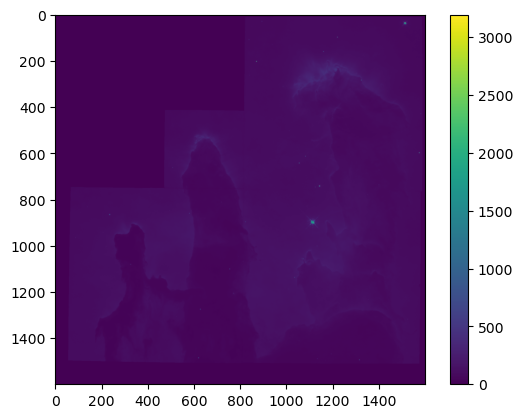

In [19]:
#3.1
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("astro_image.csv")
graph = plt.imshow(data)
cbar = plt.colorbar(graph)

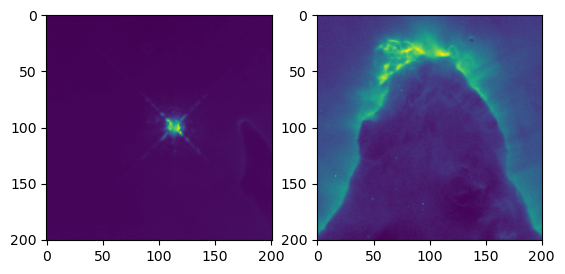

In [28]:
#3.1 Part 2
fig, axes = plt.subplots(1,2)
axes[0].imshow(data[800:1001, 1000:1201])
axes[1].imshow(data[500:701, 550:751])

In [50]:

import pandas as pd

ramen = pd.read_csv('ramen-ratings.csv')

print(ramen.columns)
print(ramen.iloc[27])
print(ramen['Brand'].nunique())

ramen = ramen.sort_values(by="Brand")

print((ramen["Country"] == "USA").sum())
count = (((ramen["Country"] == "USA") & (ramen["Style"] == "Pack"))).sum()
print(count)

print((ramen[(ramen["Top Ten"]).notna()])["Brand"].nunique())

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')
Review #                                  2553
Brand                                   Nissin
Variety     Hakata Ramen Noodle White Tonkotsu
Style                                     Bowl
Country                                  Japan
Stars                                     4.75
Top Ten                                    NaN
Name: 27, dtype: object
355
323
128
21


In [25]:
#3.3
from astropy.table import Table

data = Table.read('global_CCl4_MM.dat', comment="#", format="ascii", delimiter=' ', guess=False)
data = data.to_pandas()
data = data[['CCl4ottoyr', 'CCl4ottoGLm', 'CCl4ottoGLsd']]
print(data)

     CCl4ottoyr  CCl4ottoGLm  CCl4ottoGLsd
0          1996          NaN           NaN
1          1996          NaN           NaN
2          1996          NaN           NaN
3          1996      104.144         0.155
4          1996      103.893         0.174
..          ...          ...           ...
283        2019          NaN           NaN
284        2019          NaN           NaN
285        2019          NaN           NaN
286        2019          NaN           NaN
287        2019          NaN           NaN

[288 rows x 3 columns]


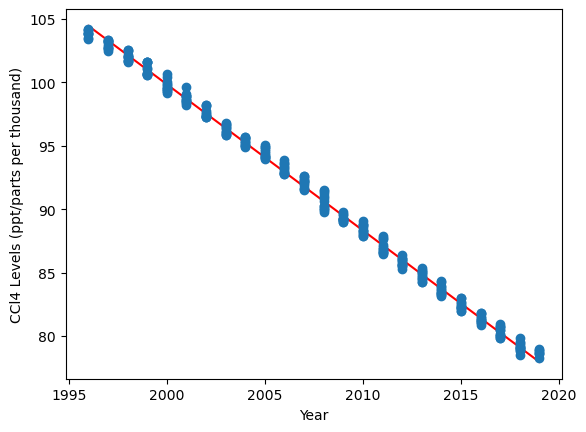

3666.079921982028
13.187337848856215


In [46]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.errorbar(data['CCl4ottoyr'], data['CCl4ottoGLm'], yerr=data['CCl4ottoGLsd'], fmt='o')
plt.xlabel('Year')
plt.ylabel('CCl4 Levels (ppt/parts per thousand)')


masked_data = data[data['CCl4ottoyr'].notna() & data['CCl4ottoGLm'].notna()]

#coefficients = np.polyfit(masked_data['CCl4ottoyr'], masked_data['CCl4ottoGLm'], 1)
#print(coefficients)

def model(x, a, b):
    return a * x + b
p0 = (-1.14326355e+00, 2.38630050e+03)

popt, pcov = curve_fit(model, masked_data['CCl4ottoyr'], masked_data['CCl4ottoGLm'], sigma=masked_data['CCl4ottoGLsd'], absolute_sigma=True, p0=p0)

slope, intercept = popt

y_fit = model(masked_data['CCl4ottoyr'], slope, intercept)
plt.plot(masked_data['CCl4ottoyr'], y_fit, color="red")

plt.show()


y_obs   = masked_data['CCl4ottoGLm']
y_err   = masked_data['CCl4ottoGLsd']

chi2 = np.sum( ((y_obs - y_fit) / y_err)**2 )

N = len(y_obs)
p = 2
chi2_red = chi2 / (N - p)

print(chi2)
print(chi2_red)

In [ ]:
#The model is not ideal, as being off by 13 is not good compared to an ideal value of 1.  It is also possible I calculated it wrong,
#though, as the line looks too good to be off by that much

In [ ]:
class cup:
    def __init__(self, size_oz, fill_with, fill_amount=1.0):
        self.size = size_oz
        self.drink = fill_with
        if 0 <= fill_amount <= 1.0:
            self.fill = fill_amount
        else:
            print("invalid! please enter a fill between 0 and 1")
            fill = 1.0
    
    def drink(self, ounces_drank):
        self.fill = self.fill - (ounces_drank / self.size) 
        if self.fill < 0:
            print("Cup is empty!")
            self.fill = 0
    
    def refill(self):
        self.fill = 1.0